# Modeling

In [4]:
from datetime import datetime
start_time = datetime.now()

# Libraries to load
# !pip install lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#import lightgbm as lgb
import numpy as np
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:00.213650


In [95]:
%%time
vars = pd.read_csv('vars_final.csv')
print(vars.shape)
vars.head()

(96397, 22)
CPU times: user 212 ms, sys: 43.5 ms, total: 256 ms
Wall time: 259 ms


card_zip_total_3  card_state_max_30  card_zip_total_14  card_state_avg_0  \
0              3.62               3.62               3.62              3.62   
1             31.42              31.42              31.42             31.42   
2            178.49             178.49             178.49            178.49   
3              3.62               3.62               3.62              3.62   
4              7.24               3.62               7.24              3.62   

   card_zip_total_0  card_merch_avg_1  card_zip_avg_1  card_merch_avg_0  \
0              3.62              3.62            3.62              3.62   
1             31.42             31.42           31.42             31.42   
2            178.49            178.49          178.49            178.49   
3              3.62              3.62            3.62              3.62   
4              7.24              3.62            3.62              3.62   

   card_zip_avg_0  card_state_total_0  ...  Cardnum_total_7  merch_zip_avg_0  \
0            3.62                3.62  ...             3.62             3.62   
1           31.42               31.42  ...            31.42            31.42   
2          178.49              178.49  ...           178.49           178.49   
3            3.62                3.62  ...             3.62             3.62   
4            3.62                7.24  ...             7.24             3.62   

   card_state_avg_1  card_merch_total_0  merch_zip_total_0  card_zip_max_7  \
0              3.62                3.62               3.62            3.62   
1             31.42               31.42              31.42           31.42   
2            178.49              178.49             178.49          178.49   
3              3.62                3.62               7.24            3.62   
4              3.62                7.24              10.86            3.62   

   merch_state_max_1  Merchnum_avg_1  Recnum  Fraud  
0               3.62            3.62       1      0  
1              31.42           31.42       2      0  
2             178.49          178.49       3      0  
3               3.62            3.62       4      0  
4               3.62            3.62       5      0  

[5 rows x 22 columns]

In [96]:
final_vars = pd.read_csv('final_vars_list.csv')
final_vars

variable name
0     card_zip_total_3
1    card_state_max_30
2    card_zip_total_14
3     card_state_avg_0
4     card_zip_total_0
5     card_merch_avg_1
6       card_zip_avg_1
7     card_merch_avg_0
8       card_zip_avg_0
9   card_state_total_0
10      Merchnum_avg_0
11   card_state_max_14
12     Cardnum_total_7
13     merch_zip_avg_0
14    card_state_avg_1
15  card_merch_total_0
16   merch_zip_total_0
17      card_zip_max_7
18   merch_state_max_1
19      Merchnum_avg_1

In [97]:
numvars = min(15,len(final_vars))
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(final_vars.iloc[i]['variable name'])
    
final_vars_list

['Recnum',
 'Fraud',
 'card_zip_total_3',
 'card_state_max_30',
 'card_zip_total_14',
 'card_state_avg_0',
 'card_zip_total_0',
 'card_merch_avg_1',
 'card_zip_avg_1',
 'card_merch_avg_0',
 'card_zip_avg_0',
 'card_state_total_0',
 'Merchnum_avg_0',
 'card_state_max_14',
 'Cardnum_total_7',
 'merch_zip_avg_0',
 'card_state_avg_1']

In [98]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

Recnum  Fraud  card_zip_total_3  card_state_max_30  card_zip_total_14  \
0       1      0              3.62               3.62               3.62   
1       2      0             31.42              31.42              31.42   
2       3      0            178.49             178.49             178.49   
3       4      0              3.62               3.62               3.62   
4       5      0              7.24               3.62               7.24   

   card_state_avg_0  card_zip_total_0  card_merch_avg_1  card_zip_avg_1  \
0              3.62              3.62              3.62            3.62   
1             31.42             31.42             31.42           31.42   
2            178.49            178.49            178.49          178.49   
3              3.62              3.62              3.62            3.62   
4              3.62              7.24              3.62            3.62   

   card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
0              3.62            3.62                3.62            3.62   
1             31.42           31.42               31.42           31.42   
2            178.49          178.49              178.49          178.49   
3              3.62            3.62                3.62            3.62   
4              3.62            3.62                7.24            3.62   

   card_state_max_14  Cardnum_total_7  merch_zip_avg_0  card_state_avg_1  
0               3.62             3.62             3.62              3.62  
1              31.42            31.42            31.42             31.42  
2             178.49           178.49           178.49            178.49  
3               3.62             3.62             3.62              3.62  
4               3.62             7.24             3.62              3.62

In [99]:
vars.shape

(96397, 17)

In [100]:
# use this to cap variables. For some problems it helps
Clip = 10

In [11]:
# vars.rename(columns={'fraud_label':'Fraud'},inplace=True)

In [101]:
vars['Fraud'].sum()

1059

In [102]:
vars.head(10)

Recnum  Fraud  card_zip_total_3  card_state_max_30  card_zip_total_14  \
0       1      0              3.62               3.62               3.62   
1       2      0             31.42              31.42              31.42   
2       3      0            178.49             178.49             178.49   
3       4      0              3.62               3.62               3.62   
4       5      0              7.24               3.62               7.24   
5       6      0              3.67               3.67               3.67   
6       7      0              3.62               3.62               3.62   
7       8      0            230.32             230.32             230.32   
8       9      0             62.11              62.11              62.11   
9      10      0             10.86               3.62              10.86   

   card_state_avg_0  card_zip_total_0  card_merch_avg_1  card_zip_avg_1  \
0              3.62              3.62              3.62            3.62   
1             31.42             31.42             31.42           31.42   
2            178.49            178.49            178.49          178.49   
3              3.62              3.62              3.62            3.62   
4              3.62              7.24              3.62            3.62   
5              3.67              3.67              3.67            3.67   
6              3.62              3.62              3.62            3.62   
7            230.32            230.32            230.32          230.32   
8             62.11             62.11             62.11           62.11   
9              3.62             10.86              3.62            3.62   

   card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
0              3.62            3.62                3.62        3.620000   
1             31.42           31.42               31.42       31.420000   
2            178.49          178.49              178.49      178.490000   
3              3.62            3.62                3.62        3.620000   
4              3.62            3.62                7.24        3.620000   
5              3.67            3.67                3.67        3.632500   
6              3.62            3.62                3.62        3.630000   
7            230.32          230.32              230.32      230.320000   
8             62.11           62.11               62.11       62.110000   
9              3.62            3.62               10.86        3.628333   

   card_state_max_14  Cardnum_total_7  merch_zip_avg_0  card_state_avg_1  
0               3.62             3.62         3.620000              3.62  
1              31.42            31.42        31.420000             31.42  
2             178.49           178.49       178.490000            178.49  
3               3.62             3.62         3.620000              3.62  
4               3.62             7.24         3.620000              3.62  
5               3.67             3.67         3.632500              3.67  
6               3.62             3.62         3.630000              3.62  
7             230.32           230.32       230.320000            230.32  
8              62.11            62.11        62.110000             62.11  
9               3.62            10.86         3.628333              3.62

In [103]:
vars.shape

(96397, 17)

In [104]:
vars.describe()

Recnum         Fraud  card_zip_total_3  card_state_max_30  \
count  96397.000000  96397.000000      96397.000000       96397.000000   
mean   48365.481820      0.010986        642.134217         708.868973   
std    27945.003883      0.104236       4066.803407        1298.434957   
min        1.000000      0.000000          0.010000           0.010000   
25%    24154.000000      0.000000         58.350000          87.060000   
50%    48365.000000      0.000000        185.770000         325.540000   
75%    72578.000000      0.000000        556.940000         919.250000   
max    96753.000000      1.000000     306633.410000       47900.000000   

       card_zip_total_14  card_state_avg_0  card_zip_total_0  \
count       96397.000000      96397.000000      96397.000000   
mean          806.656625        395.314624        531.796481   
std          4186.923501        787.180841       2623.087903   
min             0.010000          0.010000          0.010000   
25%            85.000000         35.900000         47.330000   
50%           257.000000        144.090000        160.940000   
75%           718.640000        438.700000        495.900000   
max        306633.410000      28392.840000     217467.180000   

       card_merch_avg_1  card_zip_avg_1  card_merch_avg_0  card_zip_avg_0  \
count      96397.000000    96397.000000      96397.000000    96397.000000   
mean         397.187315      397.210357        395.826148      395.642384   
std          799.383027      797.150785        796.952579      794.751387   
min            0.010000        0.010000          0.010000        0.010000   
25%           35.570000       36.000000         34.990000       35.000000   
50%          144.000000      145.000000        141.100000      141.600000   
75%          438.940000      439.740000        435.300000      435.730000   
max        28392.840000    28392.840000      28392.840000    28392.840000   

       card_state_total_0  Merchnum_avg_0  card_state_max_14  Cardnum_total_7  \
count        96397.000000    96397.000000       96397.000000     96397.000000   
mean           553.964679      395.596185         604.530312      2384.036098   
std           2640.513216      743.196563        1190.454702      7158.500841   
min              0.010000        0.010000           0.010000         0.140000   
25%             49.120000       40.105000          66.960000       292.400000   
50%            169.000000      163.875000         258.250000       986.140000   
75%            514.680000      455.940000         734.180000      2566.000000   
max         217467.180000    26910.000000       47900.000000    312616.060000   

       merch_zip_avg_0  card_state_avg_1  
count     96397.000000      96397.000000  
mean        395.390956        396.843695  
std         759.258495        784.448231  
min           0.010000          0.010000  
25%          39.950000         38.261944  
50%         159.143333        149.990000  
75%         452.500000        445.990000  
max       28392.840000      28392.840000

In [105]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

Fraud
0      0
1      0
2      0
3      0
4      0

## Scale and truncate field values

In [106]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

card_zip_total_3  card_state_max_30  card_zip_total_14  \
count      96397.000000       96397.000000       96397.000000   
mean         642.134217         708.868973         806.656625   
std         4066.803407        1298.434957        4186.923501   
min            0.010000           0.010000           0.010000   
25%           58.350000          87.060000          85.000000   
50%          185.770000         325.540000         257.000000   
75%          556.940000         919.250000         718.640000   
max       306633.410000       47900.000000      306633.410000   

       card_state_avg_0  card_zip_total_0  card_merch_avg_1  card_zip_avg_1  \
count      96397.000000      96397.000000      96397.000000    96397.000000   
mean         395.314624        531.796481        397.187315      397.210357   
std          787.180841       2623.087903        799.383027      797.150785   
min            0.010000          0.010000          0.010000        0.010000   
25%           35.900000         47.330000         35.570000       36.000000   
50%          144.090000        160.940000        144.000000      145.000000   
75%          438.700000        495.900000        438.940000      439.740000   
max        28392.840000     217467.180000      28392.840000    28392.840000   

       card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
count      96397.000000    96397.000000        96397.000000    96397.000000   
mean         395.826148      395.642384          553.964679      395.596185   
std          796.952579      794.751387         2640.513216      743.196563   
min            0.010000        0.010000            0.010000        0.010000   
25%           34.990000       35.000000           49.120000       40.105000   
50%          141.100000      141.600000          169.000000      163.875000   
75%          435.300000      435.730000          514.680000      455.940000   
max        28392.840000    28392.840000       217467.180000    26910.000000   

       card_state_max_14  Cardnum_total_7  merch_zip_avg_0  card_state_avg_1  
count       96397.000000     96397.000000     96397.000000      96397.000000  
mean          604.530312      2384.036098       395.390956        396.843695  
std          1190.454702      7158.500841       759.258495        784.448231  
min             0.010000         0.140000         0.010000          0.010000  
25%            66.960000       292.400000        39.950000         38.261944  
50%           258.250000       986.140000       159.143333        149.990000  
75%           734.180000      2566.000000       452.500000        445.990000  
max         47900.000000    312616.060000     28392.840000      28392.840000

In [107]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [108]:
# push in any outlier values
cols = X.columns
X.loc[:,cols] = X[cols].clip(upper=Clip)
X.loc[:,cols] = X[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

card_zip_total_3  card_state_max_30  card_zip_total_14  \
count      96397.000000       96397.000000       96397.000000   
mean          -0.012607          -0.010834          -0.012245   
std            0.448265           0.821933           0.496200   
min           -0.157894          -0.545933          -0.192659   
25%           -0.143549          -0.478891          -0.172360   
50%           -0.112217          -0.295224          -0.131279   
75%           -0.020949           0.162027          -0.021022   
max           10.000000          10.000000          10.000000   

       card_state_avg_0  card_zip_total_0  card_merch_avg_1  card_zip_avg_1  \
count      96397.000000      96397.000000      96397.000000    96397.000000   
mean          -0.007463         -0.011770         -0.007813       -0.007750   
std            0.861074          0.483555          0.854892        0.855468   
min           -0.502178         -0.202733         -0.496855       -0.498275   
25%           -0.456585         -0.184693         -0.452371       -0.453127   
50%           -0.319145         -0.141382         -0.316728       -0.316390   
75%            0.055115         -0.013685          0.052231        0.053352   
max           10.000000         10.000000         10.000000       10.000000   

       card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
count      96397.000000    96397.000000        96397.000000    96397.000000   
mean          -0.007632       -0.007563           -0.011640       -0.007036   
std            0.857771        0.858435            0.495104        0.871930   
min           -0.496662       -0.497806           -0.209791       -0.532277   
25%           -0.452770       -0.453780           -0.191192       -0.478327   
50%           -0.319625       -0.319650           -0.145792       -0.311790   
75%            0.049531        0.050440           -0.014878        0.081195   
max           10.000000       10.000000           10.000000       10.000000   

       card_state_max_14  Cardnum_total_7  merch_zip_avg_0  card_state_avg_1  
count       96397.000000     96397.000000     96397.000000      96397.000000  
mean           -0.011541        -0.014465        -0.007430         -0.007682  
std             0.794561         0.694553         0.859908          0.856945  
min            -0.507806        -0.333016        -0.520746         -0.505876  
25%            -0.451567        -0.292189        -0.468142         -0.457113  
50%            -0.290881        -0.195278        -0.311156         -0.314684  
75%             0.108908         0.025419         0.075217          0.062651  
max            10.000000        10.000000        10.000000         10.000000

In [20]:
# separate data into modeling (traintest) and out of time
oot_recnum=84300
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [21]:
niter = 0
nitermax = 10
FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models. You can comment out any of these cells and just explore one model type. You can also just rerun that single cell multiple times as you explore different model hyperparameters.

In [ ]:
%%time
# Logistic regression

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression(max_iter=1000)
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

In [ ]:
%%time
# Single DT

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier()
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

In [23]:
%%time
# RF

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_split=200,  min_samples_leaf=30)
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.8363939899833055 0.7437722419928826 0.5977653631284916
1 0.8378812199036918 0.7821011673151751 0.6033519553072626
2 0.8437001594896332 0.7786561264822134 0.6089385474860335
3 0.8421926910299004 0.802158273381295 0.5977653631284916
4 0.8488372093023255 0.7446043165467626 0.6145251396648045
5 0.8380634390651085 0.7722419928825622 0.6033519553072626
6 0.8242811501597445 0.7913385826771654 0.5698324022346368
7 0.8154574132492114 0.8048780487804879 0.5586592178770949
8 0.8214285714285714 0.7992424242424242 0.6256983240223464
9 0.8359621451104101 0.8089430894308943 0.6145251396648045
trn    0.834420
tst    0.782794
oot    0.599441
dtype: float64
CPU times: user 2min 47s, sys: 1.56 s, total: 2min 49s
Wall time: 2min 50s


In [ ]:
%%time
# BT

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier()

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

In [ ]:
%%time
# NN

for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier()

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

In [ ]:
print('duration: ', datetime.now() - start_time)

## The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like. But you can't change from your best hyperparameters.

In [22]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
model = RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_split=200, min_samples_leaf=30)

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())   

predictions = model.predict_proba(X_trn_save)[:,1]
X_trn['predicted'] = predictions
X_trn['Fraud'] = Y_trn_save['Fraud']
topRows = int(round(X_trn.shape[0]*0.03))
temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

predictions = model.predict_proba(X_tst)[:,1]
X_tst['predicted']=predictions
X_tst['Fraud'] = Y_tst['Fraud']
topRows = int(round(X_tst.shape[0]*0.03))
temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

predictions = model.predict_proba(X_oot)[:,1]
X_oot['predicted']=predictions
X_oot['Fraud'] = Y_oot['Fraud']
topRows = int(round(X_oot.shape[0]*0.03))
temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])

0 0.8406504065040651 0.7396226415094339 0.5921787709497207


In [23]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [24]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

card_zip_total_3  card_state_max_30  card_zip_total_14  \
89183          9.996093           5.843774           9.670017   
89186         10.000000           5.843774           9.716424   
89130          9.371485           5.843774           9.063329   
89134          9.444795           5.843774           9.134536   
89174          9.579341           5.843774           9.265221   
89328          6.534829          10.000000           6.308055   
95844         10.000000          10.000000          10.000000   
89114          6.531345           2.241938           6.304671   
89128          7.238920           2.241938           6.991946   
89129          7.331398           2.241938           7.081771   
89121          7.123633           2.241938           6.879966   
89117          6.633029           2.241938           6.403438   
89077          5.411856           2.241938           5.217299   
89120          6.720243           2.241938           6.488149   
89075          5.282020           2.241938           5.091188   
89074          5.163020           2.241938           4.975602   
89065          6.187468          10.000000           5.970659   
88278          6.167219          10.000000           5.950991   
89068          4.433260           2.241938           4.266778   
89927          5.791002          10.000000           5.585567   

       card_state_avg_0  card_zip_total_0  card_merch_avg_1  card_zip_avg_1  \
89183          1.189488          6.904608          1.169510        1.172756   
89186          1.093164          6.978681          1.125031        1.128153   
89130          1.357499          5.936223          1.234563        1.237991   
89134          1.234087          6.049882          1.187719        1.191016   
89174          1.153996          6.258480          1.154382        1.157586   
89328         10.000000         10.000000         10.000000       10.000000   
95844         10.000000         10.000000         10.000000       10.000000   
89114          0.654530          1.532905          1.049998        1.052909   
89128          0.546603          2.629921          0.950470        0.953103   
89129          0.489500          2.773298          0.914290        0.916821   
89121          0.603251          2.451181          0.984903        0.987632   
89117          0.549298          1.690555          1.005235        1.008021   
89077          1.190454          8.432540          1.169939        1.173187   
89120          0.463453          1.825769          0.961134        0.963797   
89075          1.254321          8.231243          1.232831        1.236255   
89074          1.330436          8.046747          1.307784        1.311418   
89065         10.000000          9.635039         10.000000       10.000000   
88278         10.000000          9.603644         10.000000       10.000000   
89068          1.192041          6.915336          1.171502        1.174754   
89927         10.000000          9.020362         10.000000       10.000000   

       card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
89183          1.174261        1.177744            6.850648        1.259506   
89186          1.079119        1.082339            6.924232        1.157482   
89130          1.340212        1.344155            5.888653        1.437460   
89134          1.218313        1.221919            6.001563        1.306744   
89174          1.139205        1.142591            6.208784        1.221914   
89328         10.000000       10.000000           10.000000        5.274851   
95844         10.000000       10.000000           10.000000       10.000000   
89114          0.645863        0.647883            1.514393        0.692888   
89128          0.539259        0.540984            2.604170        0.578573   
89129          0.482857        0.484425            2.746601        0.518091   
89121          0.595213        0.597093            2.426610        0.638574   
89117          0.541921        0.

In [25]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_trn

bin  #recs     #g     #b          %g         %b      tot       cg  \
0      0.0    0.0    0.0    0.0    0.000000   0.000000      0.0      0.0   
1      1.0  590.0  254.0  336.0   43.050847  56.949153    590.0    254.0   
2      2.0  590.0  448.0  142.0   75.932203  24.067797   1180.0    702.0   
3      3.0  590.0  551.0   39.0   93.389831   6.610169   1770.0   1253.0   
4      4.0  590.0  559.0   31.0   94.745763   5.254237   2360.0   1812.0   
..     ...    ...    ...    ...         ...        ...      ...      ...   
96    96.0  590.0  590.0    0.0  100.000000   0.000000  56650.0  56035.0   
97    97.0  590.0  590.0    0.0  100.000000   0.000000  57240.0  56625.0   
98    98.0  590.0  590.0    0.0  100.000000   0.000000  57830.0  57215.0   
99    99.0  590.0  590.0    0.0  100.000000   0.000000  58420.0  57805.0   
100  100.0  590.0  590.0    0.0  100.000000   0.000000  59010.0  58395.0   

        cb         %cg         FDR         KS        FPR  
0      0.0    0.000000    0.000000   0.000000   0.000000  
1    336.0    0.434969   54.634146  54.199178   0.755952  
2    478.0    1.202158   77.723577  76.521420   1.468619  
3    517.0    2.145732   84.065041  81.919309   2.423598  
4    548.0    3.103005   89.105691  86.002686   3.306569  
..     ...         ...         ...        ...        ...  
96   615.0   95.958558  100.000000   4.041442  91.113821  
97   615.0   96.968919  100.000000   3.031081  92.073171  
98   615.0   97.979279  100.000000   2.020721  93.032520  
99   615.0   98.989640  100.000000   1.010360  93.991870  
100  615.0  100.000000  100.000000   0.000000  94.951220  

[101 rows x 13 columns]

In [26]:
FDR3.to_csv('FDR3.csv')

In [24]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [ ]:
print("duration: ", datetime.now() - start_time)

In [27]:
X_oot = X_oot_orig.copy()
Y_oot_orig = Y_oot['Fraud'].copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

In [28]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)
RF_final=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_split=200, min_samples_leaf=30)
RF_final.fit(X_trn, Y_trn.values.ravel())

RandomForestClassifier(max_depth=30, min_samples_leaf=30, min_samples_split=200,
                       n_estimators=150)

In [65]:
def fraud_savings(model,X_data, Y_data,i):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    top_rows = int(len(X_data)*i*.01)
    sum_bads = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==1].count()
    fraud_savings = sum_bads*2000    
    return fraud_savings

In [38]:
saving = {}
for i in range(0,51):
    Y_oot_orig = pd.DataFrame(Y_oot_orig)
    
    Y_oot_orig['Fraud Proba'] = RF_final.predict_proba(X_oot_orig)[:,1].tolist()
    Y_oot_orig = Y_oot_orig.sort_values(by='Fraud Proba',ascending=False)
    top_rows = int(len(X_oot_orig)*i*.01)
    sum_bads = Y_oot_orig['Fraud'].head(top_rows)[Y_oot_orig['Fraud']==1].count()
    fraud_savings = sum_bad*2000
    saving[i] = fraud_savings

In [40]:
# loss = {}
# for i in range(0,51):
#     Y_oot_orig = pd.DataFrame(Y_oot_orig)
#     Y_oot_orig['Fraud Proba'] = RF_final.predict_proba(X_oot_orig)[:,1].tolist()
#     Y_oot_orig = Y_oot_orig.sort_values(by='Fraud Proba',ascending=False)
#     top_rows = int(len(X_oot_orig)*i*.01)
#     sum_loss = Y_oot_orig['Fraud'].head(top_rows)[Y_oot_orig['Fraud']==0].count()
#     fraud_loss = sum_bads*2000
#     loss[i] = fraud_loss

In [72]:
fraud_score = RF_final.predict_proba(X)[:,1].tolist()

In [75]:
df = pd.read_csv('card transactions.csv')

In [76]:
df

Recnum     Cardnum        Date       Merchnum        Merch description  \
0           1  5142190439  2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1           2  5142183973  2006-01-01    61003026333  SERVICE MERCHANDISE #81   
2           3  5142131721  2006-01-01  4503082993600        OFFICE DEPOT #191   
3           4  5142148452  2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4           5  5142190439  2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
...       ...         ...         ...            ...                      ...   
96748   96749  5142276053  2006-12-31  3500000006160   BEST BUY      00001610   
96749   96750  5142225701  2006-12-31  8090710030950   MARKUS OFFICE SUPPLIES   
96750   96751  5142226486  2006-12-31  4503057341100            TECH PAC, INC   
96751   96752  5142244619  2006-12-31  8834000695412                  BUY.COM   
96752   96753  5142243247  2006-12-31  9108347680006    STAPLES NATIONAL #471   

      Merch state  Merch zip Transtype   Amount  Fraud  
0              TN    38118.0         P     3.62      0  
1              MA     1803.0         P    31.42      0  
2              MD    20706.0         P   178.49      0  
3              TN    38118.0         P     3.62      0  
4              TN    38118.0         P     3.62      0  
...           ...        ...       ...      ...    ...  
96748          KY    41042.0         P    84.79      0  
96749          OH    45248.0         P   118.75      0  
96750          OH    45150.0         P   363.56      0  
96751          CA    92656.0         P  2202.03      0  
96752          NJ     7606.0         P   554.64      0  

[96753 rows x 10 columns]

In [112]:
vars['fraud_score']=fraud_score
vars

Recnum  Fraud  card_zip_total_3  card_state_max_30  card_zip_total_14  \
0           1      0              3.62               3.62               3.62   
1           2      0             31.42              31.42              31.42   
2           3      0            178.49             178.49             178.49   
3           4      0              3.62               3.62               3.62   
4           5      0              7.24               3.62               7.24   
...       ...    ...               ...                ...                ...   
96392   96749      0             84.79              84.79              84.79   
96393   96750      0            118.75            1385.00             718.60   
96394   96751      0            363.56             363.56             363.56   
96395   96752      0           2202.03            2202.03            2202.03   
96396   96753      0           3864.32            3142.52            3864.32   

       card_state_avg_0  card_zip_total_0  card_merch_avg_1  card_zip_avg_1  \
0                  3.62              3.62              3.62            3.62   
1                 31.42             31.42             31.42           31.42   
2                178.49            178.49            178.49          178.49   
3                  3.62              3.62              3.62            3.62   
4                  3.62              7.24              3.62            3.62   
...                 ...               ...               ...             ...   
96392             84.79             84.79             84.79           84.79   
96393            118.75            118.75            118.75          118.75   
96394            363.56            363.56            363.56          363.56   
96395           2202.03           2202.03           2202.03         2202.03   
96396            554.64            554.64            554.64          554.64   

       card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
0                  3.62            3.62                3.62          3.6200   
1                 31.42           31.42               31.42         31.4200   
2                178.49          178.49              178.49        178.4900   
3                  3.62            3.62                3.62          3.6200   
4                  3.62            3.62                7.24          3.6200   
...                 ...             ...                 ...             ...   
96392             84.79           84.79               84.79         84.7900   
96393            118.75          118.75              118.75        118.7500   
96394            363.56          363.56              363.56       1445.2225   
96395           2202.03         2202.03             2202.03       2202.0300   
96396            554.64          554.64              554.64        554.6400   

       card_state_max_14  Cardnum_total_7  merch_zip_avg_0  card_state_avg_1  \
0                   3.62             3.62           3.6200             3.620   
1                  31.42            31.42          31.4200            31.420   
2                 178.49           178.49         178.4900           178.490   
3                   3.62             3.62           3.6200             3.620   
4                   3.62             7.24           3.6200             3.620   
...                  ...              ...              ...               ...   
96392              84.79            84.79          84.7900            84.790   
96393            1385.00          3140.25         118.7500           118.750   
96394             363.56          2578.13        1445.2225           217.705   
96395            2202.03          2202.03        2202.0300          2202.030   
96396            3142.52          6457.51         554.6400           554.640   

       prediction  fraud_score  
0               0     0.000000  
1               0     0.000000  
2               0     0.000000  
3               0     0.000000  
4               0     

In [109]:
RF_final.predict_proba(X)[:,1].tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0010790833599457234,
 0.00019933993399339934,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0007711554994601014,
 0.0,
 0.0005887209719973994,
 0.0,
 0.0,
 0.018981374624587877,
 0.0010231209976407144,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.000306553911205074,
 0.007847411839382838,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.7210884353741498e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.003793529361018151,
 0.024043002187910067,
 0.0,
 0.0,
 0.0,
 0.0,
 2.7210884353741498e-05,
 0.0,
 0.0003732802440458267,
 0.0008146830620296319,
 0.0025827497945857874,
 0.005969787035982132,
 0.000777372632249796,
 0.0006108819678264122,
 2.7210884353741498e-05,
 0.002094944916537007,
 0.004131947601371144,
 0.0014269945135345,
 4.830917874396135e-05,
 0.0006108819678264122,
 0.0005275611813887701,
 0.0007117435839026626,
 0.0,
 2.7210884353741498e-05,
 0.0007117435839026626,
 0.0005275611813887701,
 0.00032041802228

In [144]:
RF_final.predict_proba(X)

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.92319371e-01, 7.68062896e-03],
       [9.99835813e-01, 1.64186537e-04],
       [8.68119291e-01, 1.31880709e-01]])

In [110]:
vars['prediction']=RF_final.predict(X).tolist()

In [145]:
vars[vars['prediction']==1]

Recnum  Fraud  card_zip_total_3  card_state_max_30  card_zip_total_14  \
1099     1104      0          26910.00           26910.00           26910.00   
2622     2629      0           4916.00            4916.00            4916.00   
3273     3280      0          14660.00            2500.00           14660.00   
3308     3315      0          17050.00            2500.00           17050.00   
5190     5198      0          16600.00           14800.00           16600.00   
...       ...    ...               ...                ...                ...   
89681   90027      0           4460.00            4460.00            4460.00   
89927   90273      0          24193.00           24193.00           24193.00   
92462   92812      1           5264.89            7040.74            5264.89   
95685   96038      0          24845.00           24845.00           24845.00   
95844   96198      0          49690.00           24845.00           49690.00   

       card_state_avg_0  card_zip_total_0  card_merch_avg_1  card_zip_avg_1  \
1099       26910.000000          26910.00      26910.000000    26910.000000   
2622        4916.000000           4916.00       4916.000000     4916.000000   
3273        1628.888889          14660.00       1628.888889     1628.888889   
3308        1705.000000          17050.00       1705.000000     1705.000000   
5190        8300.000000          16600.00       8300.000000     8300.000000   
...                 ...               ...               ...             ...   
89681       4460.000000           4460.00       4460.000000     4460.000000   
89927      12136.480000          24193.00      24193.000000    24193.000000   
92462       5264.890000           5264.89       5264.890000     5264.890000   
95685      24845.000000          24845.00      24845.000000    24845.000000   
95844      24845.000000          49690.00      24845.000000    24845.000000   

       card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
1099       26910.000000    26910.000000            26910.00    26910.000000   
2622        4916.000000     4916.000000             4916.00     4916.000000   
3273        1628.888889     1628.888889            14660.00     1099.138889   
3308        1705.000000     1705.000000            17050.00     1167.078947   
5190        8300.000000     8300.000000            16600.00     8300.000000   
...                 ...             ...                 ...             ...   
89681       4460.000000     4460.000000             4460.00     4460.000000   
89927      24193.000000    24193.000000            24272.96    24193.000000   
92462       5264.890000     5264.890000             5264.89     5264.890000   
95685      24845.000000    24845.000000            24845.00    24845.000000   
95844      24845.000000    24845.000000            49690.00    24845.000000   

       card_state_max_14  Cardnum_total_7  merch_zip_avg_0  card_state_avg_1  \
1099            26910.00         33567.59     26910.000000      26910.000000   
2622             4916.00         40551.18      4916.000000       4916.000000   
3273             2500.00         17234.99      1099.138889       1628.888889   
3308             2500.00         19624.99      1167.078947       1705.000000   
5190            14800.00         38606.96      8300.000000       8300.000000   
...                  ...              ...              ...               ...   
89681            4460.00         31692.80      4460.000000       4460.000000   
89927           24193.00         51336.30     24193.000000      12136.480000   
92462            7040.74         26593.93      5264.890000       5264.890000   
95685           24845.00         29289.20     24845.000000      24845.000000   
95844           24845.00         54134.20     24845.000000      24845.000000   

       prediction  fraud_score  
1099            1     0.618906  
2622            1     0.556665  
3273            1     0.529321  
3308            1     0.572364  
5190            1     

In [113]:
df_scored = pd.merge(df, vars, how='outer', on='Recnum')
df_scored

Recnum     Cardnum        Date       Merchnum        Merch description  \
0           1  5142190439  2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1           2  5142183973  2006-01-01    61003026333  SERVICE MERCHANDISE #81   
2           3  5142131721  2006-01-01  4503082993600        OFFICE DEPOT #191   
3           4  5142148452  2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4           5  5142190439  2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
...       ...         ...         ...            ...                      ...   
96748   96749  5142276053  2006-12-31  3500000006160   BEST BUY      00001610   
96749   96750  5142225701  2006-12-31  8090710030950   MARKUS OFFICE SUPPLIES   
96750   96751  5142226486  2006-12-31  4503057341100            TECH PAC, INC   
96751   96752  5142244619  2006-12-31  8834000695412                  BUY.COM   
96752   96753  5142243247  2006-12-31  9108347680006    STAPLES NATIONAL #471   

      Merch state  Merch zip Transtype   Amount  Fraud_x  ...  \
0              TN    38118.0         P     3.62        0  ...   
1              MA     1803.0         P    31.42        0  ...   
2              MD    20706.0         P   178.49        0  ...   
3              TN    38118.0         P     3.62        0  ...   
4              TN    38118.0         P     3.62        0  ...   
...           ...        ...       ...      ...      ...  ...   
96748          KY    41042.0         P    84.79        0  ...   
96749          OH    45248.0         P   118.75        0  ...   
96750          OH    45150.0         P   363.56        0  ...   
96751          CA    92656.0         P  2202.03        0  ...   
96752          NJ     7606.0         P   554.64        0  ...   

       card_merch_avg_0  card_zip_avg_0  card_state_total_0  Merchnum_avg_0  \
0                  3.62            3.62                3.62          3.6200   
1                 31.42           31.42               31.42         31.4200   
2                178.49          178.49              178.49        178.4900   
3                  3.62            3.62                3.62          3.6200   
4                  3.62            3.62                7.24          3.6200   
...                 ...             ...                 ...             ...   
96748             84.79           84.79               84.79         84.7900   
96749            118.75          118.75              118.75        118.7500   
96750            363.56          363.56              363.56       1445.2225   
96751           2202.03         2202.03             2202.03       2202.0300   
96752            554.64          554.64              554.64        554.6400   

       card_state_max_14  Cardnum_total_7  merch_zip_avg_0  card_state_avg_1  \
0                   3.62             3.62           3.6200             3.620   
1                  31.42            31.42          31.4200            31.420   
2                 178.49           178.49         178.4900           178.490   
3                   3.62             3.62           3.6200             3.620   
4                   3.62             7.24           3.6200             3.620   
...                  ...              ...              ...               ...   
96748              84.79            84.79          84.7900            84.790   
96749            1385.00          3140.25         118.7500           118.750   
96750             363.56          2578.13        1445.2225           217.705   
96751            2202.03          2202.03        2202.0300          2202.030   
96752            3142.52          6457.51         554.6400           554.640   

       prediction  fraud_score  
0             0.0     0.000000  
1             0.0     0.000000  
2             0.0     0.000000  
3             0.0     0.000000  
4             0.0     0.000000  
...           ...          ...  
96748         0.0     0.000000  
96749         0.0     0.000057  
96750         0.0     0.007681  
96751        

In [86]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [146]:
df_scored.loc[(df_scored['prediction']==1) & (df_scored['Fraud_x']==1)]

Recnum     Cardnum       Date       Merchnum  \
20020   20021  5142214614 2006-03-20  5833000984987   
20027   20028  5142214614 2006-03-20      300600391   
20034   20035  5142214614 2006-03-20  2603800006005   
20069   20070  5142214614 2006-03-20  7593860068556   
20106   20107  5142214614 2006-03-20  08-3500004724   
...       ...         ...        ...            ...   
89478   89479  5142235211 2006-11-26  4353000719908   
89519   89520  5142235211 2006-11-26  4353000719908   
89528   89529  5142235211 2006-11-26  4353000719908   
89531   89532  5142235211 2006-11-26  4353000719908   
92811   92812  5142202847 2006-12-13  4503010647100   

               Merch description Merch state  Merch zip Transtype   Amount  \
20020            COMTEQ FEDL INC          MD    20855.0         P  4306.81   
20027      NEAL R GROSS & CO INC          DC    20005.0         P  4478.48   
20034    PROFESS OFC ENTERPRISES          VA    22304.0         P  5494.82   
20069                AMC SYSTEMS          DC    20020.0         P  5053.26   
20106  CHESAPEAKE LOCK & SAFE SE          MD    20639.0         P  4278.33   
...                          ...         ...        ...       ...      ...   
89478     AMAZON.COM  *SUPERSTRE          WA    98101.0         P   298.14   
89519     AMAZON.COM  *SUPERSTOR          WA    98101.0         P   547.17   
89528     AMAZON.COM  *SUPERSTOR          WA    98101.0         P  1694.85   
89531     AMAZON.COM  *SUPERSTOR          WA    98101.0         P   194.30   
92811            SPRINT PCS #147          VA    22312.0         P  5264.89   

       Fraud_x  ...  card_merch_avg_0  card_zip_avg_0  card_state_total_0  \
20020        1  ...       4306.810000     4306.810000             4306.81   
20027        1  ...       4478.480000     4478.480000             4478.48   
20034        1  ...       5494.820000     5494.820000             5494.82   
20069        1  ...       5053.260000     5053.260000             9531.74   
20106        1  ...       4278.330000     4278.330000             8585.14   
...        ...  ...               ...             ...                 ...   
89478        1  ...       1366.764167     1366.764167            16401.17   
89519        1  ...       1303.718462     1303.718462            16948.34   
89528        1  ...       1331.656429     1331.656429            18643.19   
89531        1  ...       1255.832667     1255.832667            18837.49   
92811        1  ...       5264.890000     5264.890000             5264.89   

       Merchnum_avg_0  card_state_max_14  Cardnum_total_7  merch_zip_avg_0  \
20020     4306.810000            4306.81         23743.88      4306.810000   
20027     4478.480000            4478.48         28222.36      4478.480000   
20034     2763.480000            5494.82         33717.18      2763.480000   
20069     5053.260000            5053.26         38770.44      5053.260000   
20106     4278.330000            4306.81         46725.77      4278.330000   
...               ...                ...              ...              ...   
89478     1366.764167            8296.63         39052.26      1366.764167   
89519     1303.718462            8296.63         39599.43      1303.718462   
89528     1331.656429            8296.63         41294.28      1331.656429   
89531     1255.832667            8296.63         41488.58      1255.832667   
92811     5264.890000            7040.74         26593.93      5264.890000   

       card_state_avg_1  prediction  fraud_score  
20020       4306.810000         1.0     0.542557  
20027       4478.480000         1.0     0.556665  
20034       5494.820000         1.0     0.548774  
20069       4765.870000         1.0     0.567301  
20106       4292.570000         1.0     0.557289  
...                 ...         ...          ...  
89478       1346.629655         1.0     0.726535  
89519       1319.981000         1.0     0.726921  
89528       1332.073548         1.0     0.726921  
89531       1296.518125         1.0  

In [156]:
# Find a Recnum in the test results that had values of 1 for Predicted, Predict Proba (fraud score, and Fraud (true value)
fraud_set = df_scored.loc[(df_scored['prediction']==1) & (df_scored['Fraud_x']==1)]
fraud_set_rec = fraud_set['Recnum']
fraud_set['Merchnum'].unique()

array(['5833000984987', '300600391', '2603800006005', '7593860068556',
       '08-3500004724', '9042000846620', '73689635363', '4895900686387',
       '9420966047982', '4269000010976', '88716', '6635700620033',
       '970611866225', '6333000976139', '6880098879973', '4591200814444',
       '4063000739258', '8124900045844', '465618370333', '7593860080752',
       '17548640284', '5900000090713', '8074000313111', '808994824332',
       '5933400526666', '4574100695555', '674615479337', '602608964157',
       '994618026336', '911890629226', '253052983001', '4620009957157',
       '9108234610000', '4353000719908', '900009096891', '806961011335',
       '891204966876', '8408000980533', '672614430336', '7593980006836',
       '9289195900903', '80600010008', '4503082476300', '935616658228',
       '8834000695412', '5725000466504', '4620009750086', '4574100694444',
       '4620006363548', '9900000037306', '6002260019526', '7367000207303',
       '900009045549', '450730006NOT0', '9900000027006',

In [123]:
df_scored.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96753 entries, 0 to 96752
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recnum              96753 non-null  int64  
 1   Cardnum             96753 non-null  int64  
 2   Date                96753 non-null  object 
 3   Merchnum            93378 non-null  object 
 4   Merch description   96753 non-null  object 
 5   Merch state         95558 non-null  object 
 6   Merch zip           92097 non-null  float64
 7   Transtype           96753 non-null  object 
 8   Amount              96753 non-null  float64
 9   Fraud_x             96753 non-null  int64  
 10  Fraud_y             96397 non-null  float64
 11  card_zip_total_3    96397 non-null  float64
 12  card_state_max_30   96397 non-null  float64
 13  card_zip_total_14   96397 non-null  float64
 14  card_state_avg_0    96397 non-null  float64
 15  card_zip_total_0    96397 non-null  float64
 16  card

In [151]:
df_scored['Date']=pd.to_datetime(df_scored['Date'],format='%Y/%m/%d')
df_scored_filtered = df_scored[(df_scored['Date']>='2006/03/01')&(df_scored['Date']<'2006/05/01')]

Text(0.5, 1.0, 'Monthly - Cardnum 5142214614')

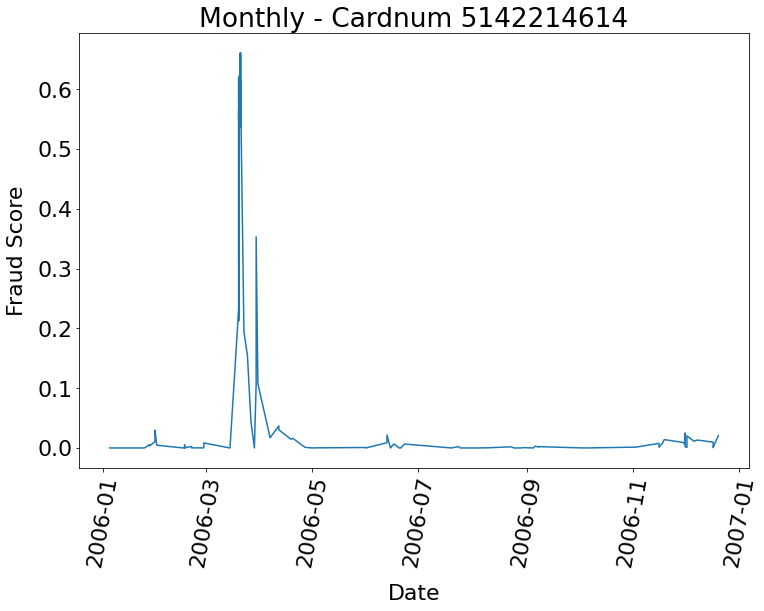

In [153]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored[df_scored['Cardnum']==5142214614]
plt.plot(temp['Date'], temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Monthly - Cardnum 5142214614")

Text(0.5, 1.0, 'Daily - Cardnum 5142214614')

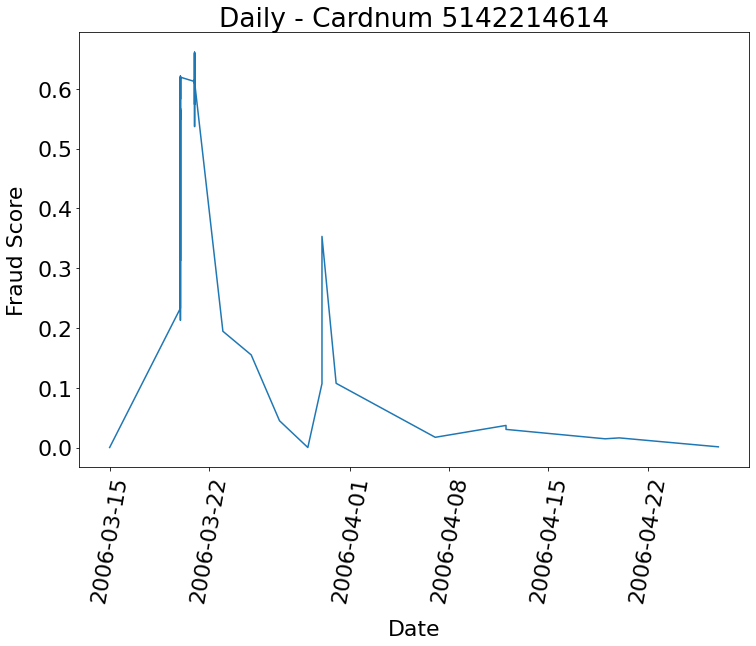

In [155]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored_filtered[df_scored_filtered['Cardnum']==5142214614]
plt.plot(temp['Date'], temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Daily - Cardnum 5142214614")

Text(0.5, 1.0, 'Monthly - Cardnum 5142214614')

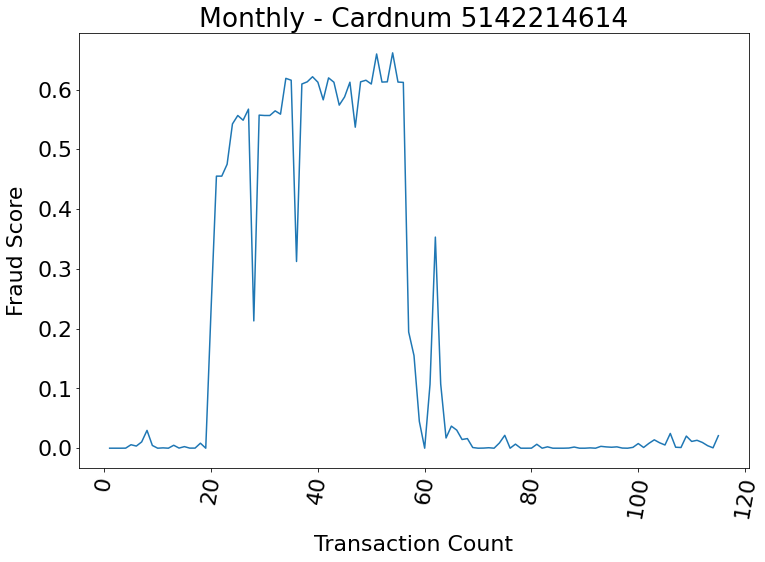

In [161]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored[df_scored['Cardnum']==5142214614]
plt.plot(range(1, len(temp)+1), temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Transaction Count', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Monthly - Cardnum 5142214614")

Text(0.5, 1.0, 'Daily - Cardnum 5142214614')

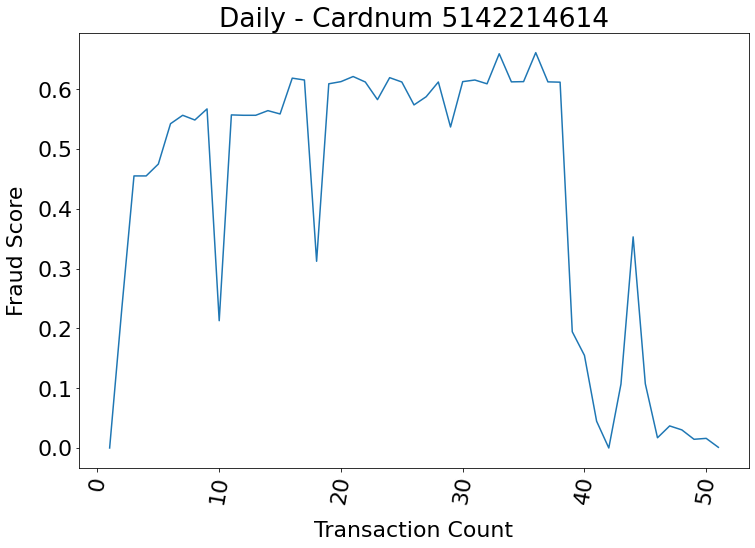

In [162]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored_filtered[df_scored_filtered['Cardnum']==5142214614]
plt.plot(range(1, len(temp)+1), temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Transaction Count', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Daily - Cardnum 5142214614")

Text(0.5, 1.0, 'Monthly - Merchnum 5833000984987')

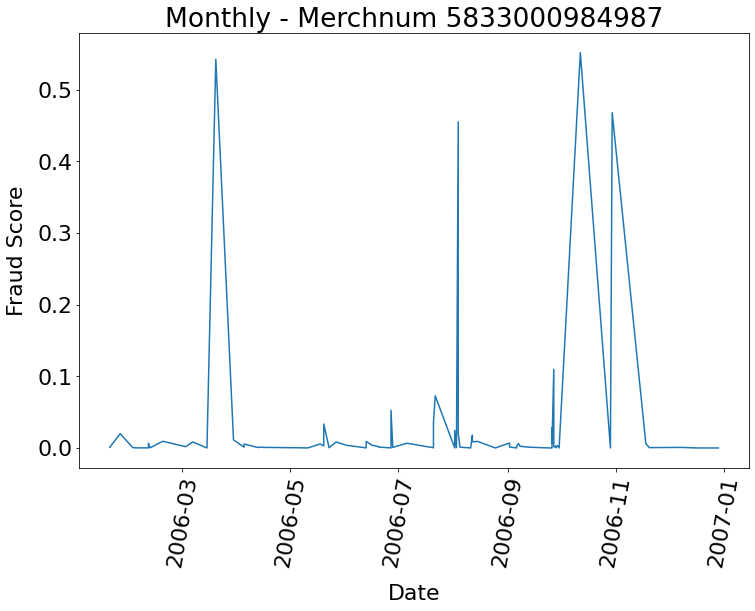

In [158]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored[df_scored['Merchnum']=='5833000984987']
plt.plot(temp['Date'], temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Monthly - Merchnum 5833000984987")

Text(0.5, 1.0, 'Daily - Merchnum 5833000984987')

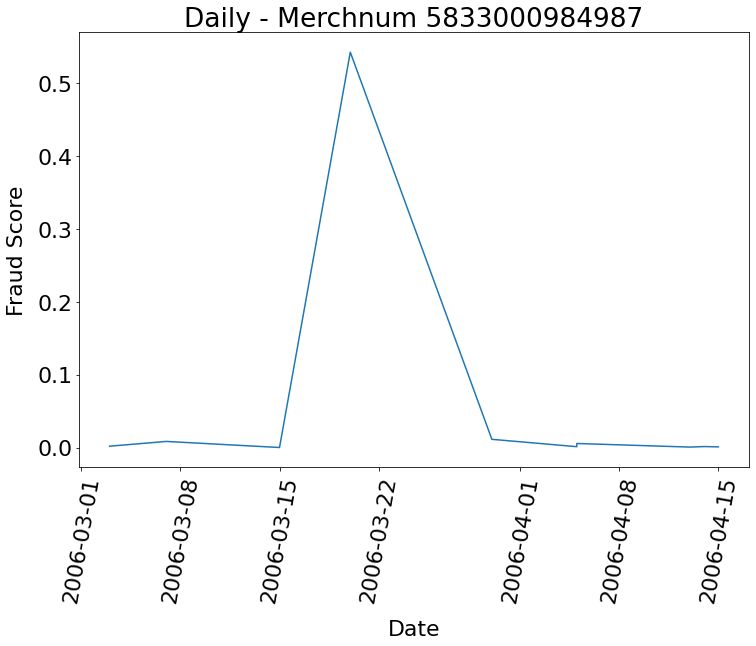

In [159]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored_filtered[df_scored_filtered['Merchnum']=='5833000984987']
plt.plot(temp['Date'], temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Daily - Merchnum 5833000984987")

Text(0.5, 1.0, 'Monthly - Merchnum 5833000984987')

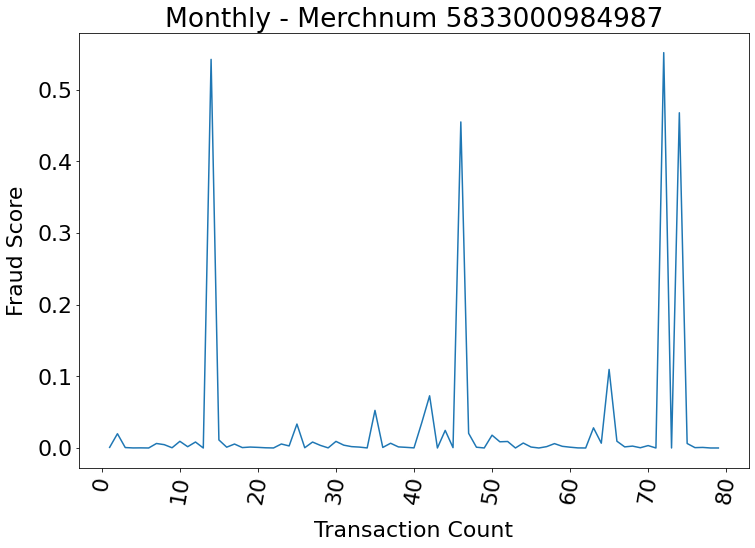

In [165]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored[df_scored['Merchnum']=='5833000984987']
plt.plot(range(1, len(temp)+1), temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Transaction Count', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Monthly - Merchnum 5833000984987")

Text(0.5, 1.0, 'Daily - Merchnum 5833000984987')

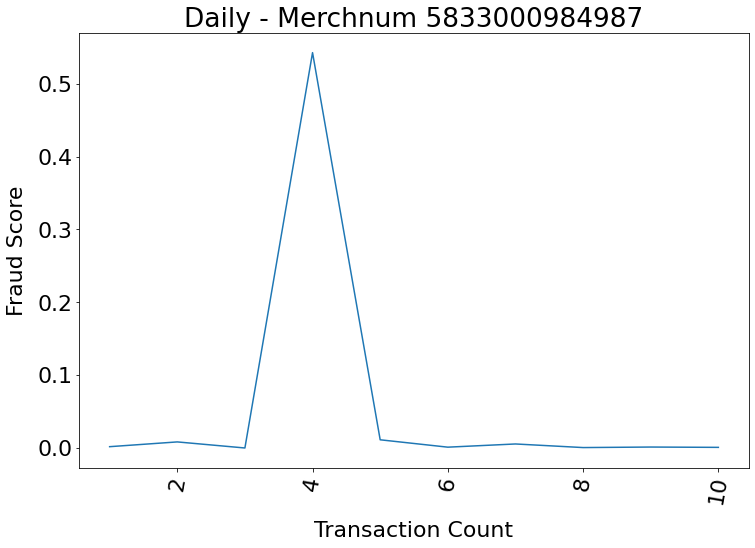

In [164]:
plt.rcParams['font.size'] = 22
fig = plt.figure(figsize=[12,8])
ax = plt.axes()
temp = df_scored_filtered[df_scored_filtered['Merchnum']=='5833000984987']
plt.plot(range(1, len(temp)+1), temp['fraud_score'])
months = mdates.MonthLocator()  # every month
#ax.xaxis.set_major_locator(months)
plt.xticks(rotation='80')
plt.xlabel('Transaction Count', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Daily - Merchnum 5833000984987")

In [ ]:
df_scored.groupby()

In [66]:
def fraud_losses(model,X_data, Y_data,i):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    top_rows = int(len(X_data)*i*.01)
    loss = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==0].count()
    fraud_losses = loss*50   
    return fraud_losses